<a href="https://colab.research.google.com/github/srivatsan2607/Prediction-using-Unsupervised-ML-Level---Beginner-/blob/main/Task_2_Prediction_using_Unsupervised_ML_(Level_Beginner).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the required libraries

In [15]:
import pandas as pd                                           # for reading the dataset
from sklearn.model_selection import train_test_split          # to split the dataset into training and test set 
from sklearn.linear_model import LinearRegression             # Linear Regression Model
import matplotlib.pyplot as plt                               # to plot the dataset and regression line
from sklearn.datasets import load_iris                        # to load in-built iris dataset

In [16]:
iris_dataset = load_iris()
print('Dataset imported successfully')

Dataset imported successfully


Importing the dataset from the URL

In [17]:
dataframe = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
dataframe.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
131,7.9,3.8,6.4,2.0
38,4.4,3.0,1.3,0.2
27,5.2,3.5,1.5,0.2
10,5.4,3.7,1.5,0.2
138,6.0,3.0,4.8,1.8
58,6.6,2.9,4.6,1.3
98,5.1,2.5,3.0,1.1
1,4.9,3.0,1.4,0.2
135,7.7,3.0,6.1,2.3
115,6.4,3.2,5.3,2.3


In [18]:
x = dataframe.iloc[:, :].values
x.shape

(150, 4)

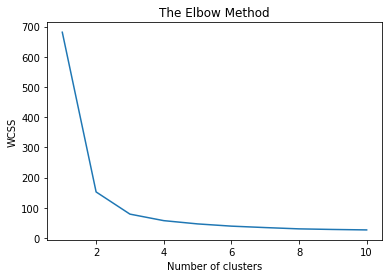

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, max_iter = 300, n_init = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print('Training completed')

Training completed


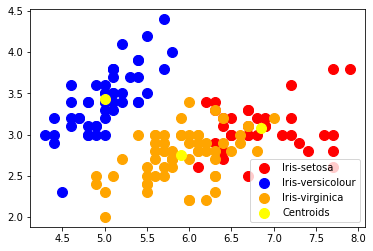

In [21]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()